In [5]:
import requests
import pandas as pd

# Alpha Vantage API URL 
api_key = 'Your_API_key'  
url = f'https://www.alphavantage.co/query?function=WTI&interval=daily&apikey={api_key}'

# SEND Request
response = requests.get(url)
data = response.json()

# timeseries
daily_data = data['data']

# Switch to Pandas DataFrame
df = pd.DataFrame(daily_data)



In [6]:
# print df
df.head()




,date,value
0,2024-09-09,69.65
1,2024-09-06,68.58
2,2024-09-05,70.09
3,2024-09-04,70.11
4,2024-09-03,71.28


In [7]:
len(df)

10093

In [8]:
# Save as CSV
df.to_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\wti_crude_oil_daily.csv', index=False)


In [9]:
df.info

<bound method DataFrame.info of              date  value
0      2024-09-09  69.65
1      2024-09-06  68.58
2      2024-09-05  70.09
3      2024-09-04  70.11
4      2024-09-03  71.28
...           ...    ...
10088  1986-01-08  25.87
10089  1986-01-07  25.85
10090  1986-01-06  26.53
10091  1986-01-03  26.00
10092  1986-01-02  25.56

[10093 rows x 2 columns]>

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
10088    0
10089    0
10090    0
10091    0
10092    0
Length: 10093, dtype: int64

In [15]:
df.isnull().sum()

date     0
value    0
dtype: int64

In [22]:
print(df['value'].dtype)

object


In [24]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [25]:
print(df['value'].dtype)
print(df['value'].isna().sum())

float64
349


In [9]:
import pandas as pd

df_1=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\wti_crude_oil_daily.csv')
df_2=pd.read_excel(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\data_gpr_daily_recent.xls')
df_3=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\All_Daily_Policy_Data.csv')
df_4=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\sp500.csv')


In [10]:
df_1.dtypes

date     object
value    object
dtype: object

In [19]:
df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce')

In [11]:
df_2.dtypes

DAY                     int64
N10D                    int64
GPRD                  float64
GPRD_ACT              float64
GPRD_THREAT           float64
date           datetime64[ns]
GPRD_MA30             float64
GPRD_MA7              float64
event                  object
var_name               object
var_label              object
dtype: object

In [15]:
df_2.head()

,DAY,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,var_name,var_label
0,19850101,216,230.039429,275.197601,153.027985,1985-01-01,230.039429,230.039429,NaN,DAY,DAY
1,19850102,315,115.676971,146.772064,87.444572,1985-01-02,172.858200,172.858200,NaN,N10D,"Number of articles (10 recent newspapers, 1985-)"
2,19850103,374,97.428459,158.937653,29.459934,1985-01-03,147.714951,147.714951,NaN,GPRD,Daily GPR (Index: 1985:2019=100)
3,19850104,421,157.366638,156.882248,157.026352,1985-01-04,150.127869,150.127869,NaN,GPRD_ACT,Daily GPR Acts (Index: 1985:2019=100)
4,19850105,285,81.361313,92.698143,77.319405,1985-01-05,136.374557,136.374557,NaN,GPRD_THREAT,Daily GPR Threats (Index: 1985:2019=100)


In [17]:
###keep var needed
df_filtered = df_2[['GPRD', 'GPRD_ACT', 'GPRD_THREAT', 'date']]


df_filtered.to_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\gpr_filtered', index=False)

In [18]:
df_filtered.head()

,GPRD,GPRD_ACT,GPRD_THREAT,date
0,230.039429,275.197601,153.027985,1985-01-01
1,115.676971,146.772064,87.444572,1985-01-02
2,97.428459,158.937653,29.459934,1985-01-03
3,157.366638,156.882248,157.026352,1985-01-04
4,81.361313,92.698143,77.319405,1985-01-05


In [12]:
df_3.dtypes

day                     int64
month                   int64
year                    int64
daily_policy_index    float64
dtype: object

In [20]:
df_3['date'] = pd.to_datetime(df_3[['year', 'month', 'day']], errors='coerce')

In [21]:
df_3.dtypes

day                            int64
month                          int64
year                           int64
daily_policy_index           float64
date                  datetime64[ns]
dtype: object

In [22]:
df_3.head()

,day,month,year,daily_policy_index,date
0,1,1,1985,103.83,1985-01-01
1,2,1,1985,296.43,1985-01-02
2,3,1,1985,56.06,1985-01-03
3,4,1,1985,118.45,1985-01-04
4,5,1,1985,88.56,1985-01-05


In [13]:
df_4.dtypes

caldt      object
sprtrn    float64
spindx    float64
dtype: object

In [14]:
df_4.head()

,caldt,sprtrn,spindx
0,2000-01-03,-0.009549,1455.22
1,2000-01-04,-0.038345,1399.42
2,2000-01-05,0.001922,1402.11
3,2000-01-06,0.000956,1403.45
4,2000-01-07,0.027090,1441.47


In [23]:
df_4['caldt'] = pd.to_datetime(df_4['caldt'], errors='coerce')
df_4 = df_4.rename(columns={'caldt': 'date'})

In [24]:
df_4.dtypes

date      datetime64[ns]
sprtrn           float64
spindx           float64
dtype: object

In [25]:
df_4.head()

,date,sprtrn,spindx
0,2000-01-03,-0.009549,1455.22
1,2000-01-04,-0.038345,1399.42
2,2000-01-05,0.001922,1402.11
3,2000-01-06,0.000956,1403.45
4,2000-01-07,0.027090,1441.47


In [26]:
merged_df = df_1.merge(df_filtered, on='date', how='outer') \
               .merge(df_3, on='date', how='outer') \
               .merge(df_4, on='date', how='outer')

In [27]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,day,month,year,daily_policy_index,sprtrn,spindx
0,1985-01-01,NaN,230.039429,275.197601,153.027985,1,1,1985,103.83,NaN,NaN
1,1985-01-02,NaN,115.676971,146.772064,87.444572,2,1,1985,296.43,NaN,NaN
2,1985-01-03,NaN,97.428459,158.937653,29.459934,3,1,1985,56.06,NaN,NaN
3,1985-01-04,NaN,157.366638,156.882248,157.026352,4,1,1985,118.45,NaN,NaN
4,1985-01-05,NaN,81.361313,92.698143,77.319405,5,1,1985,88.56,NaN,NaN


In [29]:
merged_df=pd.DataFrame(merged_df)

In [31]:
merged_df.to_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\merged_df.csv', index=False)

In [32]:
merged_df.dropna(subset=['sprtrn','spindx'], axis=0, inplace=True)

In [33]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,day,month,year,daily_policy_index,sprtrn,spindx
5480,2000-01-03,.,101.018585,92.315331,98.000137,3,1,2000,35.73,-0.009549,1455.22
5481,2000-01-04,25.56,93.751915,116.829170,71.461182,4,1,2000,109.31,-0.038345,1399.42
5482,2000-01-05,24.65,47.565075,47.418663,56.502644,5,1,2000,123.22,0.001922,1402.11
5483,2000-01-06,24.79,52.012840,51.852737,59.469170,6,1,2000,53.61,0.000956,1403.45
5484,2000-01-07,24.79,41.667515,41.539261,54.446617,7,1,2000,42.03,0.027090,1441.47


In [34]:
merged_df.drop(columns=['day','month','year'], inplace=True)


In [35]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx
5480,2000-01-03,.,101.018585,92.315331,98.000137,35.73,-0.009549,1455.22
5481,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42
5482,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11
5483,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45
5484,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47


In [36]:
merged_df.dropna(subset=['value'], axis=0, inplace=True)

In [37]:
merged_df.isnull().sum()

date                  0
value                 0
GPRD                  0
GPRD_ACT              0
GPRD_THREAT           0
daily_policy_index    0
sprtrn                0
spindx                0
dtype: int64

In [39]:
merged_df.reset_index(drop=True, inplace=True)

In [40]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx
0,2000-01-03,.,101.018585,92.315331,98.000137,35.73,-0.009549,1455.22
1,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42
2,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11
3,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45
4,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47


In [41]:
#drop row if value is nan
merged_df.dropna(subset=['value'], axis=0, inplace=True)

In [43]:
#drop if value is .
merged_df.drop(merged_df[merged_df['value'] == '.'].index, inplace=True)

In [44]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx
1,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42
2,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11
3,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45
4,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47
5,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60


In [49]:
#check value data type
merged_df['value'].dtype

dtype('O')

In [50]:
#swich to numeric type
merged_df['value'] = pd.to_numeric(merged_df['value'], errors='coerce')

In [51]:
merged_df.dropna(subset=['value'], axis=0, inplace=True)

In [52]:
merged_df['value'].dtype

dtype('float64')

In [54]:
merged_df['value'].isnull().sum()

0

In [55]:
#calculate the return of crude oil based on (price-yesterday price)/price
merged_df['oil_return'] = (merged_df['value'] - merged_df['value'].shift(1)) / merged_df['value']

In [56]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
1,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,NaN
2,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
3,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
4,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
5,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [57]:
merged_df['oil_return'].isnull().sum()

1

In [58]:
merged_df.loc[1, 'oil_return'] = -0.007825


In [59]:
merged_df.reset_index(drop=True, inplace=True)

In [60]:
merged_df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [61]:
merged_df.to_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')

In [65]:
###read raw data
orginal_df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\merged_df.csv')

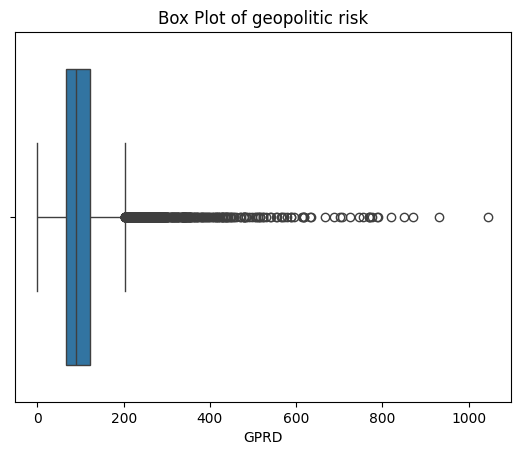

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=orginal_df['GPRD'])

# set title
plt.title('Box Plot of geopolitic risk(raw)')

# show the figure
plt.show()

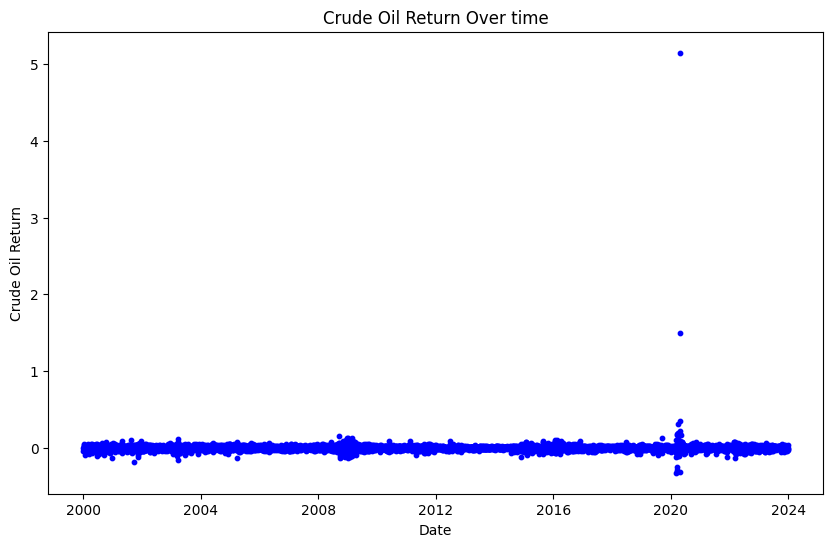

In [73]:
###try
# plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['date'], merged_df['oil_return'], color='b', s=10)
# plt.xlabel('Date')
# plt.ylabel('Crude Oil Return')
# plt.title('Crude Oil Return Over time')
# plt.grid(False)
# plt.show()


In [78]:
orginal_df['date'].dtype

dtype('O')

In [ ]:
###switch data type
orginal_df['value']=pd.to_numeric(orginal_df['value'], errors='coerce')

In [79]:
orginal_df['date']=pd.to_datetime(orginal_df['date'], errors='coerce')

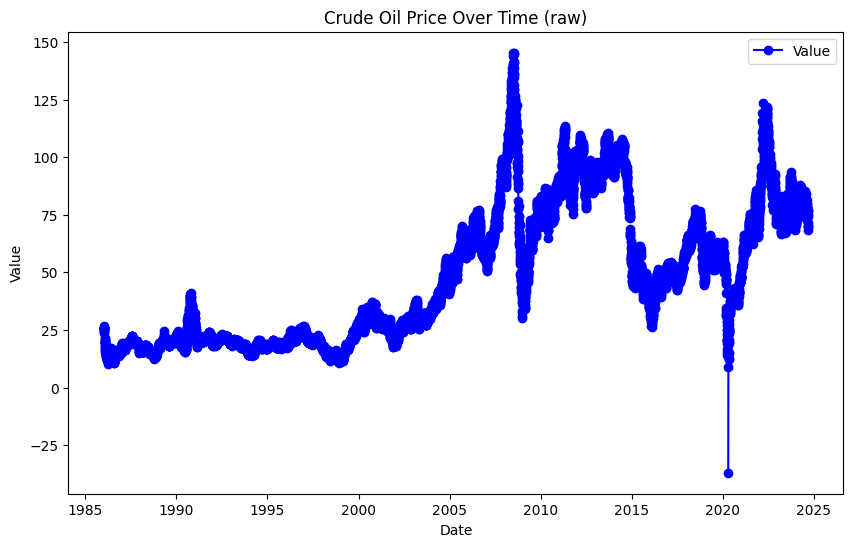

In [80]:
########plot crude oil price(raw)
plt.figure(figsize=(10, 6))
plt.plot(orginal_df['date'], orginal_df['value'], label='Value', color='b', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Crude Oil Price Over Time (raw)')
plt.legend()
plt.grid(False)
plt.show()

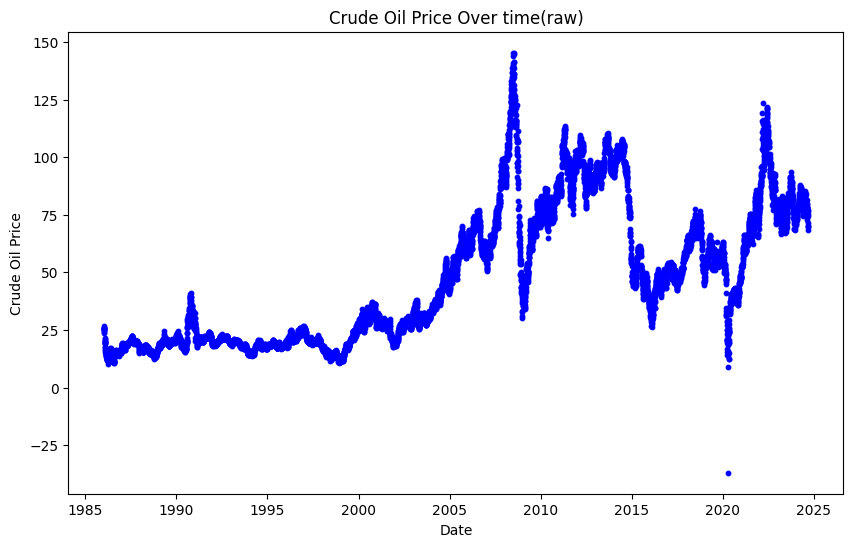

In [81]:
##scatter plot for crude oil
plt.figure(figsize=(10, 6))
plt.scatter(orginal_df['date'], orginal_df['value'], color='b', s=10)
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Over time(raw)')
plt.grid(False)
plt.show()

In [83]:
merged_df['value'].dtype

dtype('float64')

In [84]:
merged_df['value'].isnull().sum()

0

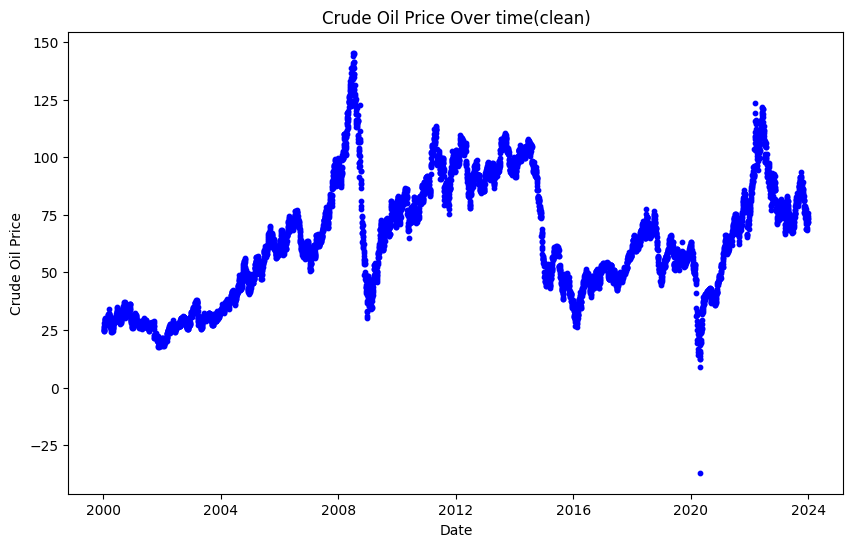

In [82]:
##scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['date'], merged_df['value'], color='b', s=10)
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Over time(clean)')
plt.grid(False)
plt.show()

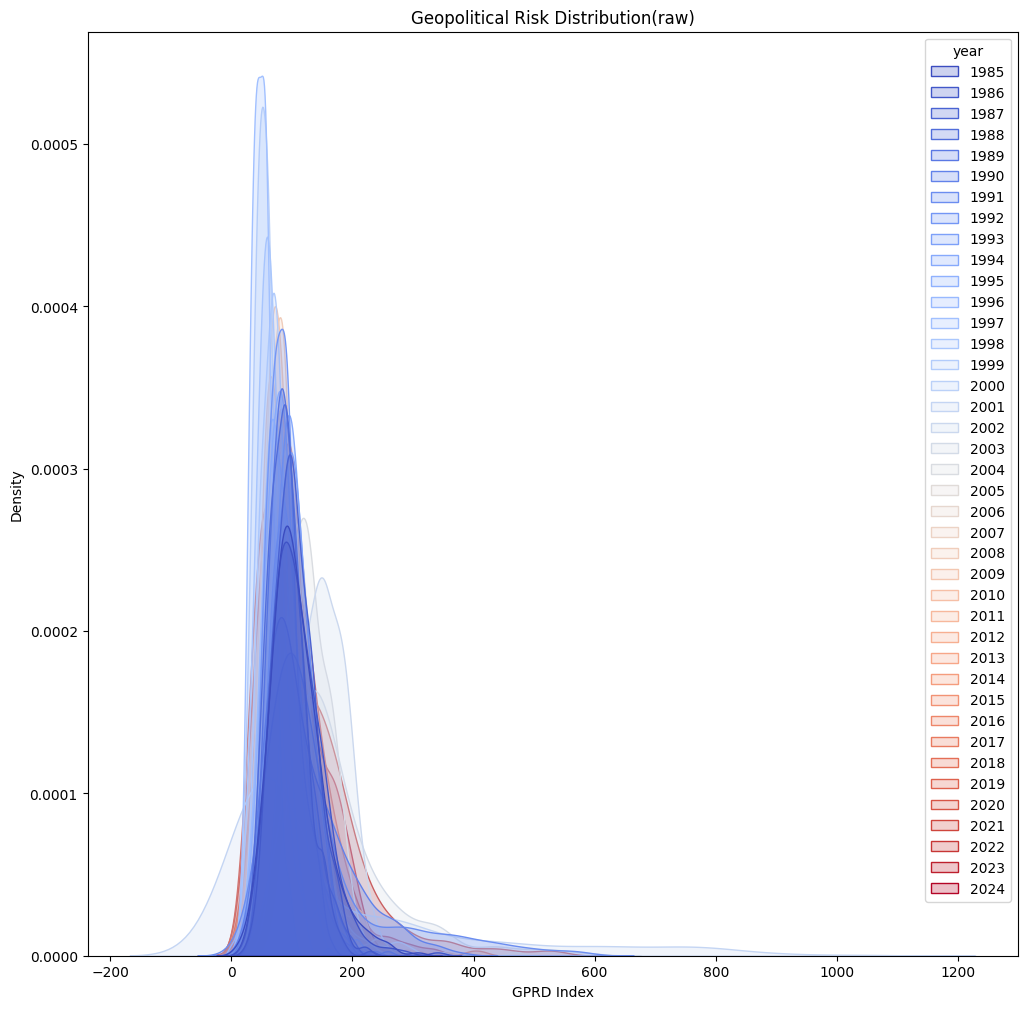

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# date should be datetime type
orginal_df['date'] = pd.to_datetime(orginal_df['date'], errors='coerce')

# get year
orginal_df['year'] = orginal_df['date'].dt.year

# plot kernel density
plt.figure(figsize=(12, 12))
sns.kdeplot(data=orginal_df, x='GPRD', hue='year', palette="coolwarm", fill=True)
plt.title('Geopolitical Risk Distribution(raw)')
plt.xlabel('GPRD Index')
plt.ylabel('Density')
plt.show()

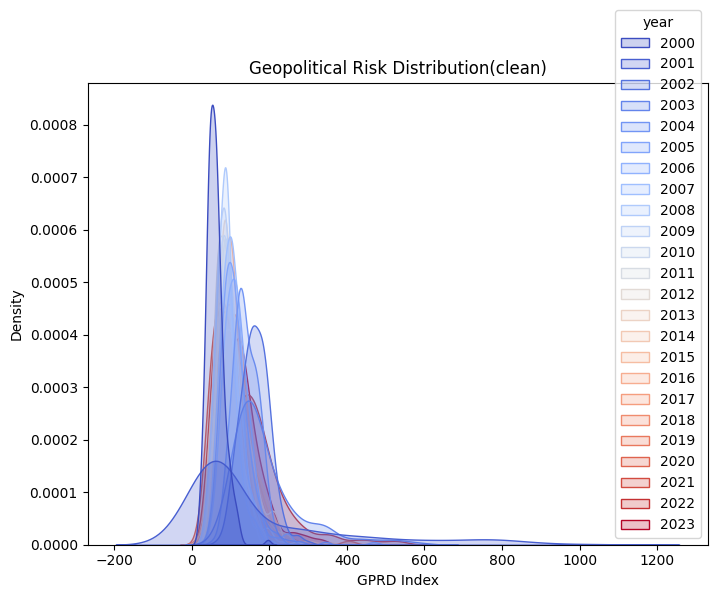

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# date should be datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# get year
merged_df['year'] = merged_df['date'].dt.year

# plot kernel density by year
plt.figure(figsize=(8, 6))
sns.kdeplot(data=merged_df, x='GPRD', hue='year', palette="coolwarm", fill=True)
plt.title('Geopolitical Risk Distribution(clean)')
plt.xlabel('GPRD Index')
plt.ylabel('Density')
plt.show()

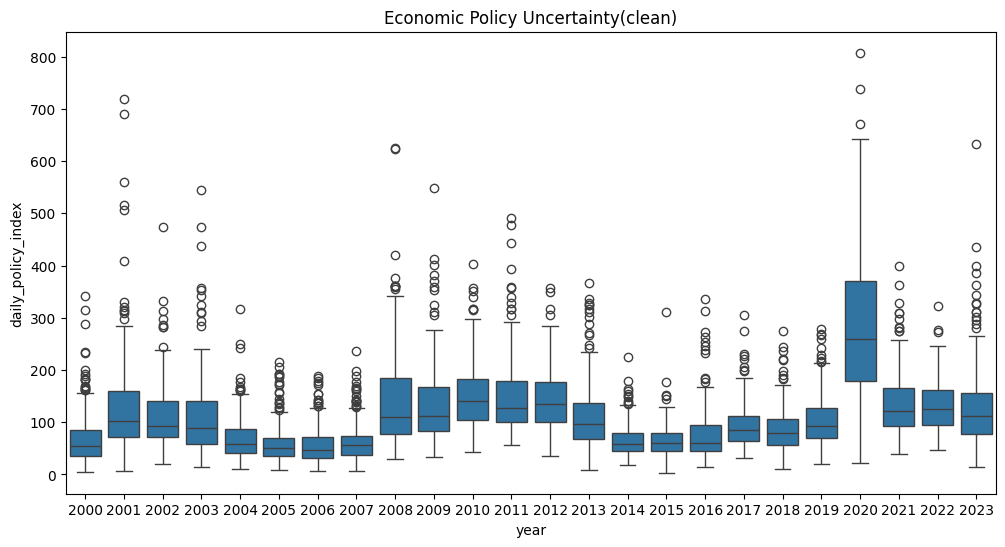

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['year'] = merged_df['date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['year'], y=merged_df['daily_policy_index'])
plt.title('Economic Policy Uncertainty(clean)')
plt.show()

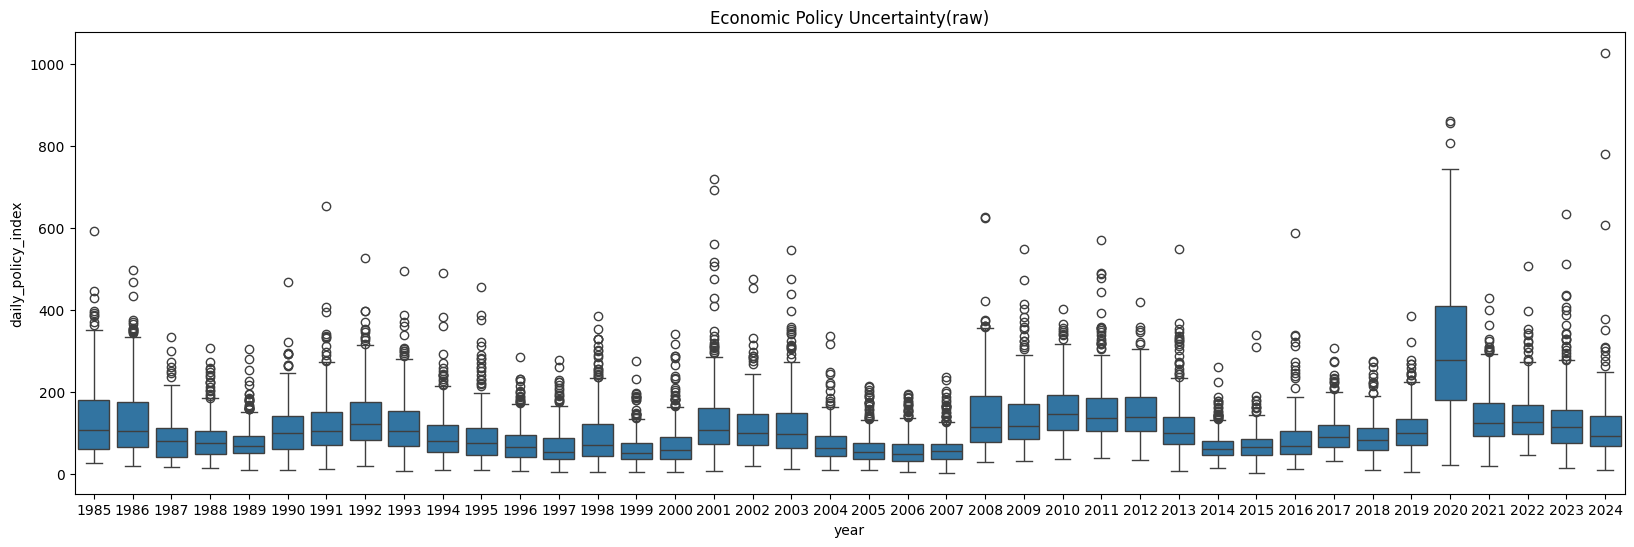

In [102]:
orginal_df['date'] = pd.to_datetime(orginal_df['date'], errors='coerce')
orginal_df['year'] = orginal_df['date'].dt.year
plt.figure(figsize=(20, 6))
sns.boxplot(x=orginal_df['year'], y=orginal_df['daily_policy_index'])
plt.title('Economic Policy Uncertainty(raw)')
plt.show()

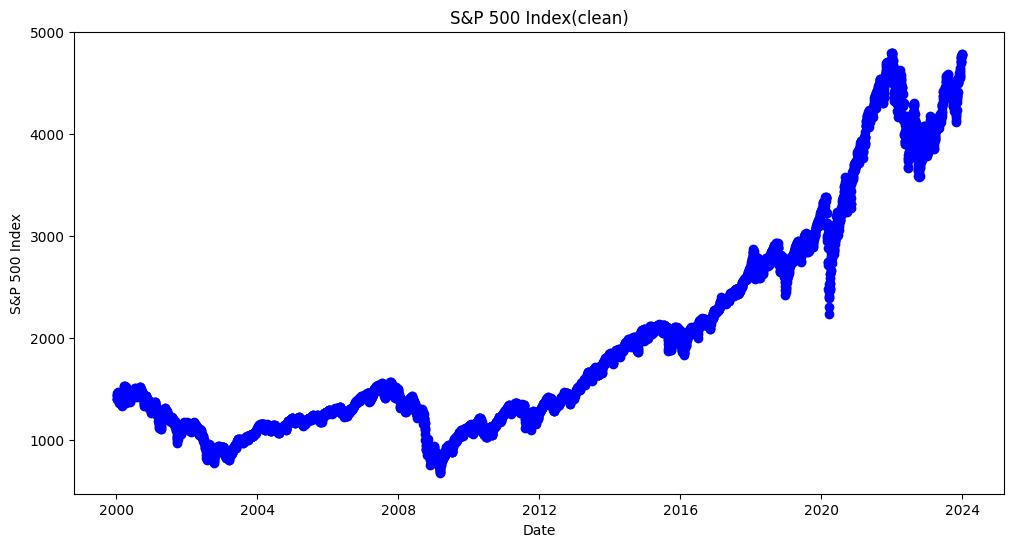

In [112]:
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
# merged_df['year'] = merged_df['date'].dt.year
#plot line chart
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['spindx'], label='S&P 500 Index', color='b', linestyle='-', marker='o')
plt.title('S&P 500 Index(clean)')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')
plt.grid(False)
plt.show()

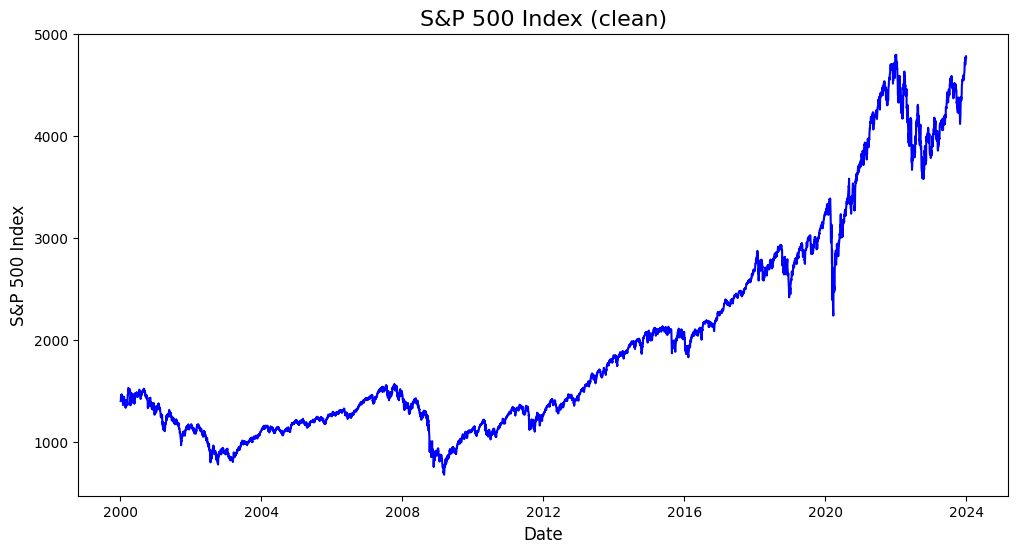

In [113]:
##sns lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='spindx', data=merged_df, color='blue')
plt.title('S&P 500 Index (clean)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('S&P 500 Index', fontsize=12)
plt.grid(False)
plt.show()

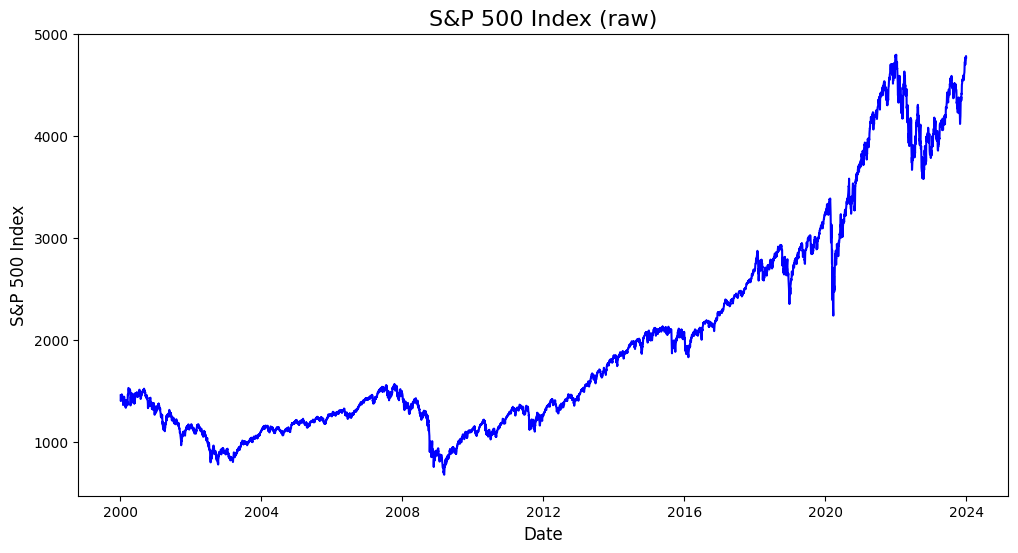

In [114]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='spindx', data=orginal_df, color='blue')
plt.title('S&P 500 Index (raw)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('S&P 500 Index', fontsize=12)
plt.grid(False)
plt.show()

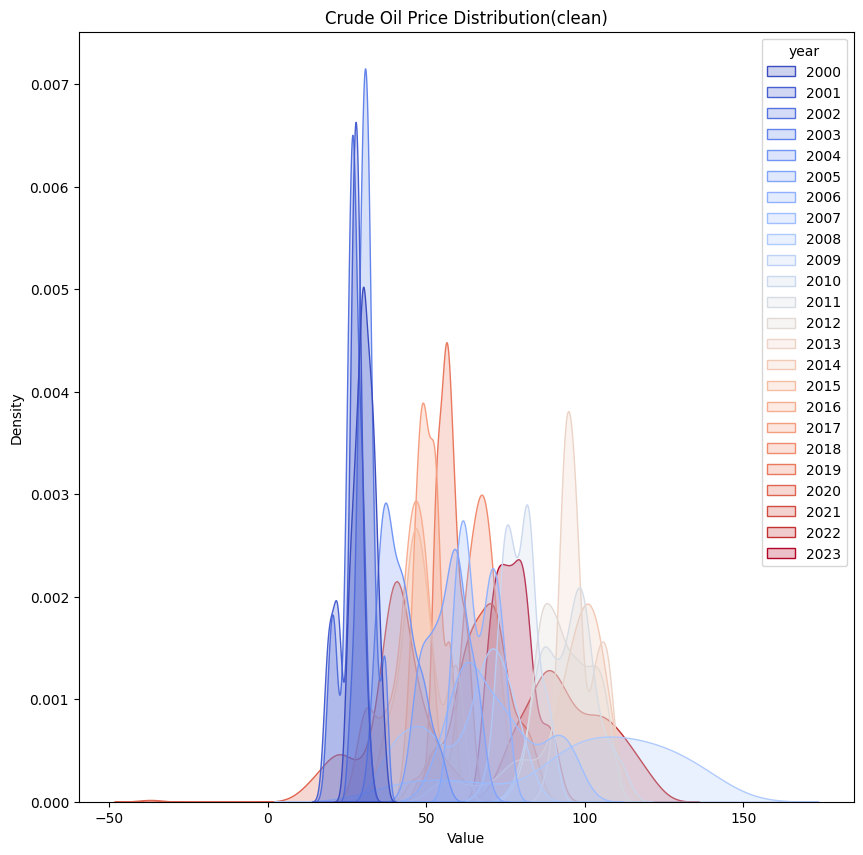

In [116]:
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['year'] = merged_df['date'].dt.year
plt.figure(figsize=(10, 10))
sns.kdeplot(data=merged_df, x='value', hue='year', palette="coolwarm", fill=True)
plt.title('Crude Oil Price Distribution(clean)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

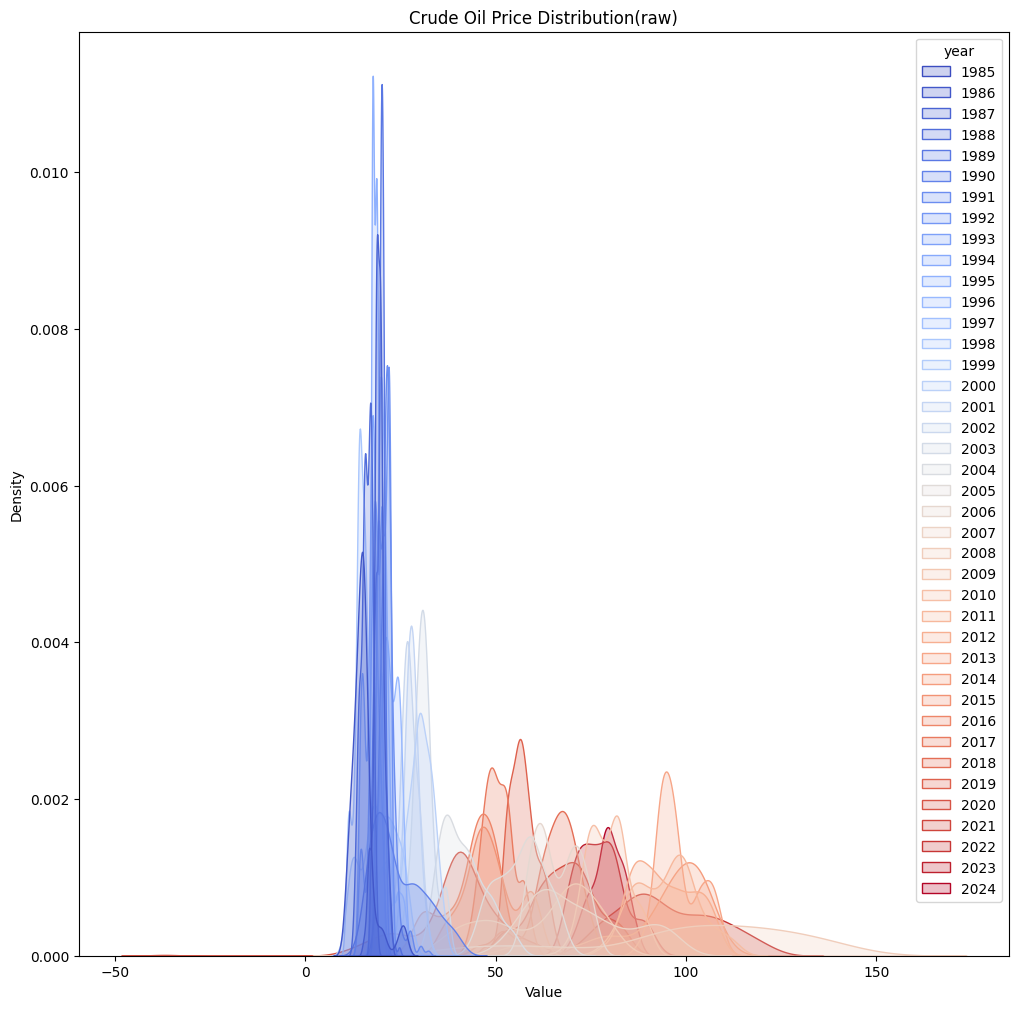

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
orginal_df['date'] = pd.to_datetime(orginal_df['date'], errors='coerce')
orginal_df['year'] = orginal_df['date'].dt.year
plt.figure(figsize=(12, 12))
sns.kdeplot(data=orginal_df, x='value', hue='year', palette="coolwarm", fill=True)
plt.title('Crude Oil Price Distribution(raw)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()